<font size='6'> Fairfax County Housing Values </font> <br style = 'line-height: 50px;'>
This project applies regression techniques to predict future housing market values for Fairfax County, VA. This area has experienced rapid development in the past and it would be insightful to see what the future could hold for this county, and by extension, the greater DC Metropolitan Area.

# Preparing the data
All data used for this project was obtained from the [Fairfax County website's demographic reports](https://www.fairfaxcounty.gov/demographics/reports). It spans the years from 1991 to 2018 and includes the estimated population, number of households, the number of housing units, median household income, and the median market value for each year. <br>
<font size='1.5'> *****Note that some data for the median household income is missing and will be dealt with appropriately**</font>

In [1]:
# Importing the libraries
from sklearn.impute import SimpleImputer
from IPython import get_ipython
from IPython.core.interactiveshell import InteractiveShell
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.set_printoptions(precision=2)

# Displaying all cell outputs
InteractiveShell.ast_node_interactivity = 'all'
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Importing the dataset
df = pd.read_csv(
    'https://rahbarprojects.s3.amazonaws.com/fairfax_county_housing.csv')
X = df.iloc[:, :-1].values
y = df.iloc[:, 5].values

# Filling in missing data
imputer = SimpleImputer()
imputer = imputer.fit(X[:, 4:5])
X[:, 4:5] = imputer.transform(X[:, 4:5])

# Converting float values to int
X = X.astype(int)

A look at the input and output variable data:

In [2]:
pd.DataFrame(X, columns=df.columns[0:5]).head()
pd.DataFrame(y, columns=[df.columns[5]]).head()

,year,population,households,units,med_household_income
0,1991,827119,296300,308202,61000
1,1992,837141,301900,312324,94082
2,1993,851858,307000,316723,64000
3,1994,863100,312000,322007,94082
4,1995,879401,317000,328151,70000


,med_market_value
0,190100
1,183700
2,183500
3,184400
4,186800


And the data, plotted side by side :

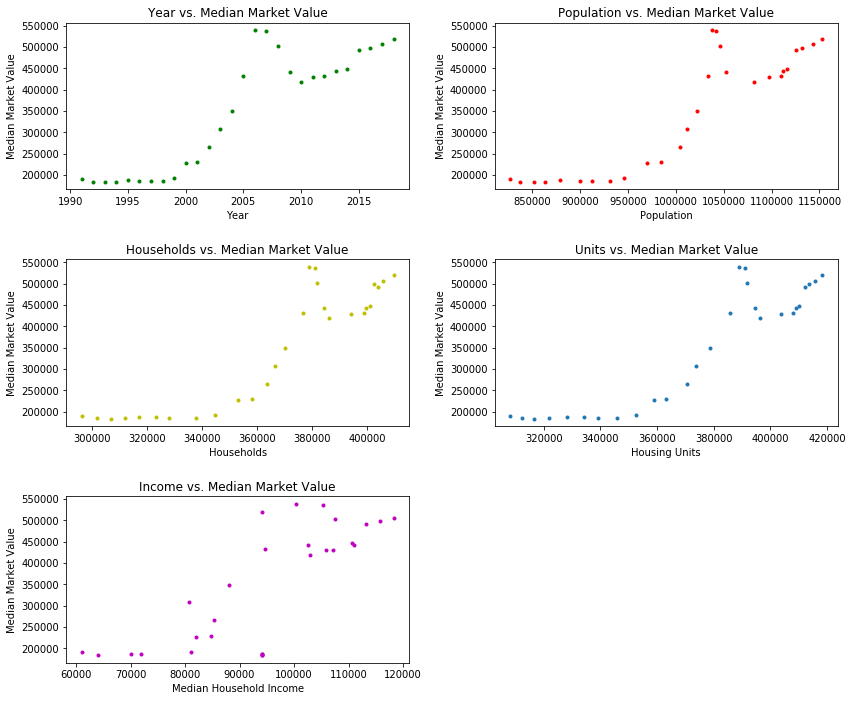

In [3]:
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.125, right=1.0, bottom=0.3,
                    top=0.9, wspace=2.0, hspace=3.0)

# Year vs. Market Value
ax1 = fig.add_subplot(321)
plt.scatter(X[:, 0], y, c='g', marker='.')
plt.title('Year vs. Median Market Value')
plt.xlabel('Year')
plt.ylabel('Median Market Value')

# Population vs. Market Value
ax2 = fig.add_subplot(322)
plt.scatter(X[:, 1], y, c='r', marker='.')
plt.title('Population vs. Median Market Value')
plt.xlabel('Population')
plt.ylabel('Median Market Value')

# Households vs. Market Value
ax3 = fig.add_subplot(323)
plt.scatter(X[:, 2], y, c='y', marker='.')
plt.title('Households vs. Median Market Value')
plt.xlabel('Households')
plt.ylabel('Median Market Value')

# Units vs. Market Value
ax4 = fig.add_subplot(324)
plt.scatter(X[:, 3], y, marker='.')
plt.title('Units vs. Median Market Value')
plt.xlabel('Housing Units')
plt.ylabel('Median Market Value')

# Income vs. Market Value
ax5 = fig.add_subplot(325)
plt.scatter(X[:, 4], y, c='m', marker='.')
plt.title('Income vs. Median Market Value')
plt.xlabel('Median Household Income')
plt.ylabel('Median Market Value')

plt.tight_layout(pad=1, w_pad=1, h_pad=1);

# Analysis/Modeling

For this project, a multivariate linear regression model will be reduced using backward elimination. First, we will have to split the data into testing and training sets and train the model on the latter. 

In [4]:
# Splitting the data into training and testing sets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

# Fitting the Linear Regression model to the training set
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Training model on testing set
y_pred = lin_reg.predict(X_test);

Then we will use the process of backward elimination with a significance level of 5% to determine if an input variable will be used for the optimal model.

In [5]:
import statsmodels.formula.api as sm

# Appending constant term
X = np.append(arr=np.ones((28, 1)).astype(int), values=X, axis=1)

# Model with all input variables
optim_X = X[:, [0, 1, 2, 3, 4, 5]]
reg_OLS = sm.OLS(endog=y, exog=optim_X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     52.08
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           1.85e-11
Time:                        18:44:55   Log-Likelihood:                -334.98
No. Observations:                  28   AIC:                             682.0
Df Residuals:                      22   BIC:                             690.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.385e+07   2.06e+07     -1.641      0.115   -7.67e+07    8.94e+06
x1           1.69e+04   1.07e+04      1.574      0.130   -5362.297    3.92e+04
x2            -5.1898      1.718     -3.022      0.006      -8.752      -1.628
x3           -11.1456      7.423     -1.501      0.147     -26.541       4.249
x4            25.8234      7.014      3.682      0.001      11.277      40.370
x5            -0.3111      0.962     -0.323      0.749      -2.306       1.684
==============================================================================
Omnibus:                        0.130   Durbin-Watson:                   0.972
Prob(Omnibus):                  0.937   Jarque-Bera (JB):                0.257
Skew:                          -0.141   Prob(JB):                        0.880
Kurtosis:                       2.625   Cond. No.                     2.92e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.92e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results above, the variable that had the least significance upon the median market value was the median household income, with a p-value of 0.749, so that will be removed. 

In [6]:
# Model with median income removed
optim_X = X[:, [0, 1, 2, 3, 4]]
reg_OLS = sm.OLS(endog=y, exog=optim_X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     67.70
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           2.20e-12
Time:                        18:44:55   Log-Likelihood:                -335.05
No. Observations:                  28   AIC:                             680.1
Df Residuals:                      23   BIC:                             686.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.194e+07   1.94e+07     -1.648      0.113    -7.2e+07    8.16e+06
x1          1.592e+04   1.01e+04      1.577      0.128   -4960.818    3.68e+04
x2            -5.0351      1.617     -3.113      0.005      -8.381      -1.690
x3           -11.0783      7.274     -1.523      0.141     -26.127       3.970
x4            25.4307      6.772      3.755      0.001      11.421      39.440
==============================================================================
Omnibus:                        0.074   Durbin-Watson:                   0.919
Prob(Omnibus):                  0.964   Jarque-Bera (JB):                0.281
Skew:                          -0.063   Prob(JB):                        0.869
Kurtosis:                       2.526   Cond. No.                     2.78e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.78e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Now the input with the least significance is the number of households, with a p-value of 0.141, so that will be removed for the next step.

In [7]:
# Model with number of households removed
optim_X = X[:, [0, 1, 2, 4]]
reg_OLS = sm.OLS(endog=y, exog=optim_X).fit()
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     84.84
Date:                Thu, 27 Jun 2019   Prob (F-statistic):           6.48e-13
Time:                        18:44:55   Log-Likelihood:                -336.40
No. Observations:                  28   AIC:                             680.8
Df Residuals:                      24   BIC:                             686.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.277e+07   1.41e+07     -3.741      0.001   -8.19e+07   -2.37e+07
x1          2.679e+04   7325.145      3.658      0.001    1.17e+04    4.19e+04
x2            -6.5381      1.316     -4.969      0.000      -9.254      -3.822
x3            16.0824      2.938      5.473      0.000      10.018      22.147
==============================================================================
Omnibus:                        0.260   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.878   Jarque-Bera (JB):                0.028
Skew:                          -0.075   Prob(JB):                        0.986
Kurtosis:                       2.960   Cond. No.                     1.87e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.87e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We have now narrowed the input variables with the highest significance on our output to be the year, the population, and the number of housing units, and have built our optimal regression model.

# Results
Show graphs and stats here

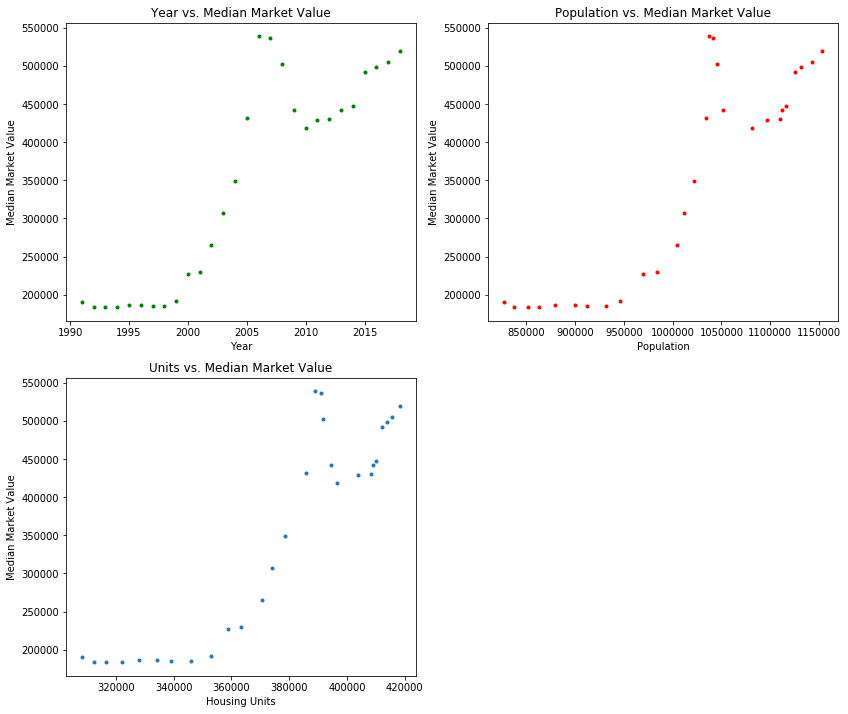

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(12, 10))
plt.subplots_adjust(left=0.125, right=1.0, bottom=0.3,
                    top=0.9, wspace=2.0, hspace=3.0)

# Year vs. Market Value
ax1 = fig.add_subplot(221)
plt.scatter(X[:, 1], y, c='g', marker='.')
plt.title('Year vs. Median Market Value')
plt.xlabel('Year')
plt.ylabel('Median Market Value')

# Population vs. Market Value
ax2 = fig.add_subplot(222)
plt.scatter(X[:, 2], y, c='r', marker='.')
plt.title('Population vs. Median Market Value')
plt.xlabel('Population')
plt.ylabel('Median Market Value')

# Units vs. Market Value
ax4 = fig.add_subplot(223)
plt.scatter(X[:, 4], y, marker='.')
plt.title('Units vs. Median Market Value')
plt.xlabel('Housing Units')
plt.ylabel('Median Market Value')

plt.tight_layout(pad=1, w_pad=1, h_pad=1);

# Conclusions and Next Steps
Summarize findings here